# TELECOM USERS - CHURN PREDICTION

+ importing libraries

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.simplefilter("ignore")

# Loading the dataset



In [256]:
telecom = pd.read_csv("telecommunications_churn.csv",sep=';')

In [257]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [258]:
# To display the top 5 rows
telecom.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0

In [259]:
# To display the bottom 5 rows
telecom.tail()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      0  
3332                  3.70         77.01      0

In [260]:
# check the shape of dataset
telecom.shape

(3333, 19)

In [261]:
# check the data structure
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [262]:
# check data types
telecom.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [263]:
# count the number of rows
telecom.count()

account_length            3333
voice_mail_plan           3333
voice_mail_messages       3333
day_mins                  3333
evening_mins              3333
night_mins                3333
international_mins        3333
customer_service_calls    3333
international_plan        3333
day_calls                 3333
day_charge                3333
evening_calls             3333
evening_charge            3333
night_calls               3333
night_charge              3333
international_calls       3333
international_charge      3333
total_charge              3333
churn                     3333
dtype: int64

In [264]:
# check for any missing values
telecom.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

+ There are no missing values in the dataset

In [265]:
telecom.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000      3333.000000          3333.000000  3333.000000   
mean       101.064806         0.276628             8.099010   179.775098   
std         39.822106         0.447398            13.688365    54.467389   
min          1.000000         0.000000             0.000000     0.000000   
25%         74.000000         0.000000             0.000000   143.700000   
50%        101.000000         0.000000             0.000000   179.400000   
75%        127.000000         1.000000            20.000000   216.400000   
max        243.000000         1.000000            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840                1.315491   
min        0.000000    23.200000            0.000000                0.000000   
25%      166.600000   167.000000            8.500000                1.000000   
50%      201.400000   201.200000           10.300000                1.000000   
75%      235.300000   235.300000           12.100000                2.000000   
max      363.700000   395.000000           20.000000                9.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         3333.000000  3333.000000  3333.000000    3333.000000   
mean             0.096910   100.435644    30.562307     100.114311   
std              0.295879    20.069084     9.259435      19.922625   
min              0.000000     0.000000     0.000000       0.000000   
25%              0.000000    87.000000    24.430000      87.000000   
50%              0.000000   101.000000    30.500000     100.000000   
75%              0.000000   114.000000    36.790000     114.000000   
max              1.000000   165.000000    59.640000     170.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     3333.000000  3333.000000   3333.000000          3333.000000   
mean        17.083540   100.107711      9.039325             4.479448   
std          4.310668    19.568609      2.275873             2.461214   
min          0.000000    33.000000      1.040000             0.000000   
25%         14.160000    87.000000      7.520000             3.000000   
50%         17.120000   100.000000      9.050000             4.000000   
75%         20.000000   113.000000     10.590000             6.000000   
max         30.910000   175.000000     17.770000            20.000000   

       international_charge  total_charge        churn  
count           3333.000000   3333.000000  3333.000000  
mean               2.764581     59.449754     0.144914  
std                0.753773     10.502261     0.352067  
min                0.000000     22.930000     0.000000  
25%                2.300000     52.380000     0.000000  
50%                2.780000     59.470000     0.000000  
75%                3.270000     66.480000     0.000000  
max                5.400000     96.150000     1.000000

# Exploratory Data Analysis

In [266]:
telecom.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

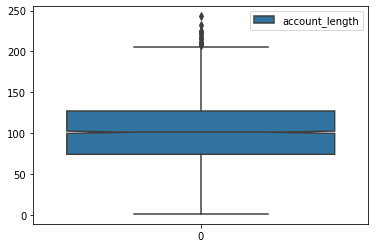

In [267]:
# detecting outliers
sns.boxplot(data=[telecom['account_length']],notch=True)
plt.legend(['account_length'])

In [268]:
Q1 =telecom.account_length.quantile(0.25)
Q3 = telecom.account_length.quantile(0.75)
Q1,Q3

(74.0, 127.0)

In [269]:
IQR = Q3-Q1
IQR

53.0

In [270]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5.5, 206.5)

In [271]:
TELE1 = telecom[(telecom.account_length<lower_limit)|(telecom.account_length>upper_limit)]


In [272]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
197              208                0                    0     326.5   
238              215                0                    0      83.6   
309              209                0                    0     227.2   
416              224                0                    0     171.5   
817              243                0                    0      95.5   
1045             217                0                    0     176.4   
1093             210                0                    0     104.6   
1387             212                0                    0     126.0   
1408             232                0                    0     165.6   
1551             225                0                    0     165.4   
1751             225                0                    0     182.7   
1886             224                0                    0     111.4   
2150             212                0                    0     226.0   
2259             210                1                   31     313.8   
2277             217                0                    0     123.7   
2700             209                0                    0     255.1   
3216             221                1                   24     180.5   
3227             209                0                    0     153.7   

      evening_mins  night_mins  international_mins  customer_service_calls  \
197          176.3       181.7                10.7                       2   
238          120.9       226.6                10.7                       0   
309          258.4       183.5                 8.9                       3   
416          160.0       212.4                 5.0                       1   
817          163.7       264.2                 6.6                       2   
1045         158.8       306.6                 9.3                       4   
1093         149.5       255.1                 6.5                       2   
1387         144.3       302.8                 7.6                       1   
1408         195.9       118.3                11.8                       1   
1551         273.7       210.0                 8.7                       0   
1751         246.5       218.0                 8.8                       1   
1886         175.0       217.2                 5.5                       3   
2150         304.6       181.2                12.6                       2   
2259         147.7       192.7                10.1                       3   
2277         248.5       269.6                13.3                       0   
2700         230.6       218.0                 8.5                       3   
3216         224.1       205.7                 2.4                       0   
3227         188.6       200.8                10.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
197                    0         67       55.51            113   
238                    0        148       14.21             91   
309                    0        128       38.62             92   
416                    1         99       29.16            103   
817                    0         92       16.24             63   
1045                   0        115       29.99            128   
1093                   0        121       17.78             71   
1387                   0         96       21.42             80   
1408                   0        104       28.15            115   
1551                   0        106       28.12            109   
1751                   0        142       31.06             63   
1886                   0        133       18.94             66   
2150                   0        127       38.42             83   
2259                   0         87       53.35            103   
2277                   0        138       21.03            105   
2700                   0        124       43.37            110   
3216                   0        

In [273]:
TELE1.shape

(18, 19)

In [274]:
telecom = telecom[(telecom.account_length>lower_limit)&(telecom.account_length<upper_limit)]


In [275]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

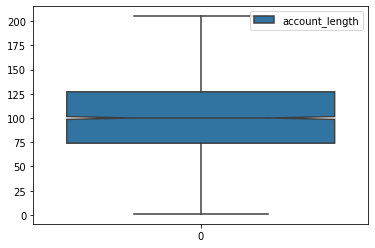

In [276]:
sns.boxplot(data=[telecom['account_length']],notch=True)
plt.legend(['account_length'])

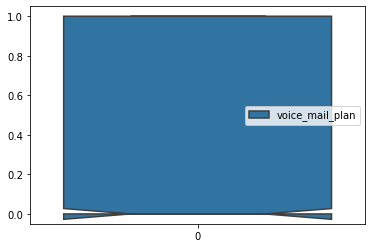

In [277]:
sns.boxplot(data=[telecom['voice_mail_plan']],notch=True)
plt.legend(['voice_mail_plan'])

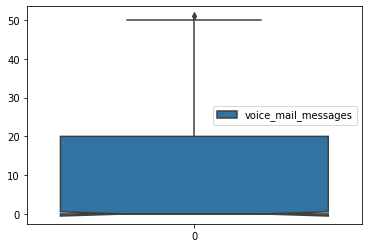

In [278]:
sns.boxplot(data=[telecom['voice_mail_messages']],notch=True)
plt.legend(['voice_mail_messages'])

In [279]:
Q1 =telecom.voice_mail_messages.quantile(0.25)
Q3 = telecom.voice_mail_messages.quantile(0.75)
Q1,Q3

(0.0, 20.0)

In [280]:
IQR = Q3-Q1
IQR

20.0

In [281]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-30.0, 50.0)

In [282]:
TELE1 = telecom[(telecom.voice_mail_messages<lower_limit)|(telecom.voice_mail_messages>upper_limit)]


In [283]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
845             144                1                   51     283.9   

     evening_mins  night_mins  international_mins  customer_service_calls  \
845         192.0       196.3                10.0                       1   

     international_plan  day_calls  day_charge  evening_calls  evening_charge  \
845                   0         98       48.26            109           16.32   

     night_calls  night_charge  international_calls  international_charge  \
845           85          8.83                    4                   2.7   

     total_charge  churn  
845         76.11      0

In [284]:
TELE1.shape

(1, 19)

In [285]:
telecom = telecom[(telecom.voice_mail_messages>lower_limit)&(telecom.voice_mail_messages<upper_limit)]


In [286]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

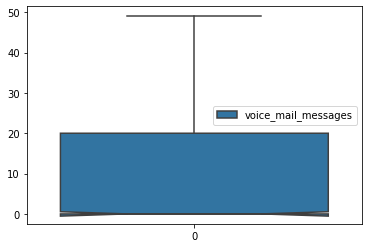

In [287]:
sns.boxplot(data=[telecom['voice_mail_messages']],notch=True)
plt.legend(['voice_mail_messages'])

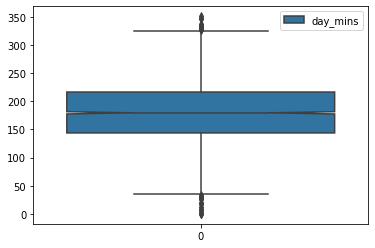

In [288]:
sns.boxplot(data=[telecom['day_mins']],notch=True)
plt.legend(['day_mins'])

In [289]:
Q1 = telecom.day_mins.quantile(0.25)
Q3 = telecom.day_mins.quantile(0.75)
Q3,Q1

(216.32500000000002, 143.7)

In [290]:
IQR = Q3-Q1
IQR

72.62500000000003

In [291]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(34.762499999999946, 325.26250000000005)

In [292]:
TELE1 = telecom[(telecom.day_mins<lower_limit)|(telecom.day_mins>upper_limit)]


In [293]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
15               161                0                    0     332.9   
156               83                0                    0     337.4   
365              154                0                    0     350.8   
605              112                0                    0     335.5   
685               63                1                   32      30.9   
741               66                0                    0      34.0   
975              129                0                    0     334.3   
985               64                0                    0     346.8   
1052              98                0                    0      12.5   
1076              53                1                   27      25.9   
1345              98                0                    0       0.0   
1397             101                0                    0       0.0   
1621             138                1                   21      19.5   
1679              82                0                    0     329.8   
1986              70                0                    0       7.9   
2028              93                0                    0     328.1   
2124              43                0                    0      27.0   
2252             148                0                    0      17.6   
2412              89                0                    0     326.3   
2594             115                0                    0     345.3   
2736             127                1                   27       2.6   
2753             134                0                    0       7.8   
3046             110                0                    0      18.9   
3174              36                1                   43      29.9   

      evening_mins  night_mins  international_mins  customer_service_calls  \
15           317.8       160.6                 5.4                       4   
156          227.4       153.9                15.8                       0   
365          216.5       253.9                10.1                       1   
605          212.5       265.0                12.7                       2   
685          187.0       230.8                 8.6                       1   
741          278.6       129.6                11.5                       0   
975          192.1       191.0                10.4                       0   
985          249.5       275.4                13.3                       1   
1052         256.6       169.4                 7.7                       1   
1076         206.5       228.1                 6.5                       1   
1345         159.6       167.1                 6.8                       4   
1397         192.1       168.8                 7.2                       1   
1621         140.9       179.7                 7.9                       0   
1679         208.3       267.1                10.6                       0   
1986         136.4       156.6                12.1                       0   
2028         151.7       303.5                 8.7                       1   
2124         160.9       279.5                10.7                       3   
2252         161.7       203.1                10.6                       1   
2412         165.1       162.9                 7.5                       1   
2594         203.4       217.5                11.8                       1   
2736         254.0       242.7                 9.2                       3   
2753         171.4       186.5                12.9                       2   
3046         258.4       109.6                14.8                       1   
3174         129.1       325.9                 8.6                       2   

      international_plan  day_calls  day_charge  evening_calls  \
15                     0         67       56.59             97   
156                    0        120       57.36            116   
365                    0         75       59.64         

In [294]:
TELE1.shape

(24, 19)

In [295]:
telecom = telecom[(telecom.day_mins>lower_limit)&(telecom.day_mins<upper_limit)]

In [296]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [297]:
telecom.shape

(3288, 19)

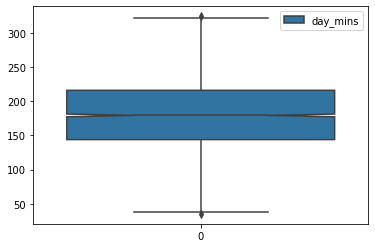

In [298]:
sns.boxplot(data=[telecom['day_mins']],notch=True)   #there are some more outliers so, i want to detect again for it
plt.legend(['day_mins'])

In [299]:
Q1 = telecom.day_mins.quantile(0.25)
Q3 = telecom.day_mins.quantile(0.75)
Q3,Q1

(216.2, 144.0)

In [300]:
IQR = Q3-Q1
IQR

72.19999999999999

In [301]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(35.70000000000002, 324.5)

In [302]:
TELE1 = telecom[(telecom.day_mins<lower_limit)|(telecom.day_mins>upper_limit)]

In [303]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
1130             122                0                    0      35.1   
2824              81                0                    0     324.7   

      evening_mins  night_mins  international_mins  customer_service_calls  \
1130         180.8       251.6                12.7                       1   
2824         236.4       187.6                13.1                       0   

      international_plan  day_calls  day_charge  evening_calls  \
1130                   0         62        5.97             89   
2824                   0         48       55.20             82   

      evening_charge  night_calls  night_charge  international_calls  \
1130           15.37           58         11.32                    2   
2824           20.09           78          8.44                    5   

      international_charge  total_charge  churn  
1130                  3.43         36.09      0  
2824                  3.54         87.27      1

In [304]:
TELE1.shape

(2, 19)

In [305]:
telecom = telecom[(telecom.day_mins>lower_limit)&(telecom.day_mins<upper_limit)]

In [306]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [307]:
telecom.shape

(3286, 19)

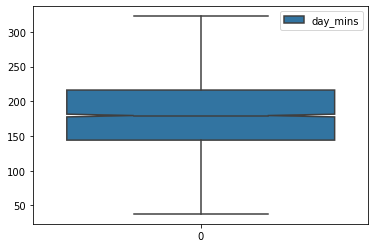

In [308]:
sns.boxplot(data=[telecom['day_mins']],notch=True) 
plt.legend(['day_mins'])

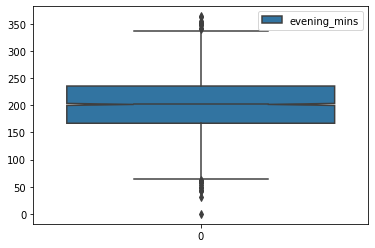

In [309]:
sns.boxplot(data=[telecom['evening_mins']],notch=True) 
plt.legend(['evening_mins'])

In [310]:
Q1 = telecom.evening_mins.quantile(0.25)
Q3 = telecom.evening_mins.quantile(0.75)
Q3,Q1

(235.3, 166.82500000000002)

In [311]:
IQR = Q3-Q1
IQR

68.475

In [312]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(64.11250000000003, 338.0125)

In [313]:
TELE1 = telecom[(telecom.evening_mins<lower_limit)|(telecom.evening_mins>upper_limit)]


In [314]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
3                 84                0                    0     299.4   
6                121                1                   24     218.2   
8                117                0                    0     184.5   
32               172                0                    0     212.0   
302              121                0                    0     170.4   
533              125                1                   36     201.3   
580              113                0                    0     209.4   
587              114                0                    0     169.6   
821               80                0                    0     105.8   
850              166                0                    0     274.3   
889              103                0                    0     198.5   
893              167                0                    0     244.8   
1054              50                0                    0     183.6   
1190             149                0                    0     156.0   
1233              48                0                    0     128.2   
1335              71                0                    0     243.7   
1601              99                0                    0     242.3   
1960              38                0                    0     149.0   
2160              94                0                    0      89.5   
2331              46                1                   34     191.4   
2551             102                0                    0     129.5   
2732             130                0                    0     216.2   
2932              97                0                    0     209.2   
3075             181                1                   40     105.2   

      evening_mins  night_mins  international_mins  customer_service_calls  \
3             61.9       196.9                 6.6                       2   
6            348.5       212.6                 7.5                       3   
8            351.6       215.8                 8.7                       1   
32            31.2       293.3                12.6                       3   
302          350.5       297.0                11.2                       0   
533           42.2       125.7                 5.4                       1   
580          347.3       246.0                 7.4                       1   
587           58.9       179.3                 7.4                       1   
821           43.9       189.6                13.1                       0   
850           52.9       246.1                10.9                       0   
889           42.5       179.2                12.4                       0   
893           60.8       176.7                10.7                       2   
1054          58.6       202.6                 8.7                       1   
1190          56.0       163.3                 8.9                       0   
1233          48.1       116.3                 8.9                       0   
1335          60.0       189.0                11.3                       0   
1601         350.9       163.1                11.3                       0   
1960          49.2       163.3                13.9                       0   
2160         339.9       172.9                 7.9                       1   
2331         361.8       147.5                 7.2                       1   
2551         354.2       145.5                10.9                       1   
2732         363.7       126.7                16.9                       5   
2932           0.0       175.4                11.8                       1   
3075         341.3       165.7                 6.3                       2   

      international_plan  day_calls  day_charge  evening_calls  \
3                      1         71       50.90             88   
6                      0         88       37.09            108   
8                      0         97       31.37         

In [315]:
telecom = telecom[(telecom.evening_mins>lower_limit)&(telecom.evening_mins<upper_limit)]

In [316]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [317]:
telecom.shape

(3262, 19)

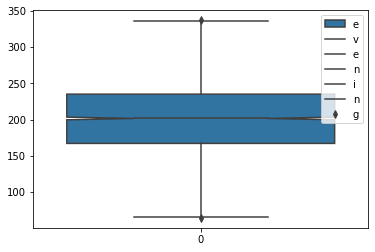

In [318]:
sns.boxplot(data=[telecom['evening_mins']],notch=True)    #still there are some outliers
plt.legend('evening_mins')

In [319]:
Q1 = telecom.evening_mins.quantile(0.25)
Q3 = telecom.evening_mins.quantile(0.75)
Q3,Q1

(235.1, 167.125)

In [320]:
IQR = Q3-Q1
IQR

67.975

In [321]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(65.16250000000001, 337.0625)

In [322]:
TELE1 = telecom[(telecom.evening_mins<lower_limit)|(telecom.evening_mins>upper_limit)]


In [323]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
186             106                0                    0     158.7   
529             100                0                    0      68.5   

     evening_mins  night_mins  international_mins  customer_service_calls  \
186          64.3       198.5                10.2                       1   
529         337.1       205.2                12.1                       0   

     international_plan  day_calls  day_charge  evening_calls  evening_charge  \
186                   0         74       26.98            139            5.47   
529                   1        110       11.65            115           28.65   

     night_calls  night_charge  international_calls  international_charge  \
186          103          8.93                    4                  2.75   
529           99          9.23                    9                  3.27   

     total_charge  churn  
186         44.13      0  
529         52.80      0

In [324]:
TELE1.shape

(2, 19)

In [325]:
telecom = telecom[(telecom.evening_mins>lower_limit)&(telecom.evening_mins<upper_limit)]

In [326]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [327]:
telecom.shape

(3260, 19)

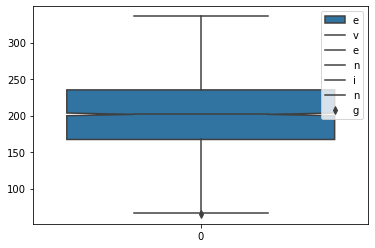

In [328]:
sns.boxplot(data=[telecom['evening_mins']],notch=True)    
plt.legend('evening_mins')

In [329]:
Q1 = telecom.evening_mins.quantile(0.25)
Q3 = telecom.evening_mins.quantile(0.75)
Q3,Q1

(235.1, 167.17499999999998)

In [330]:
IQR = Q3-Q1
IQR

67.92500000000001

In [331]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(65.28749999999997, 336.9875)

In [332]:
TELE1 = telecom[(telecom.evening_mins<lower_limit)|(telecom.evening_mins>upper_limit)]

In [333]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
1906              91                1                   39     169.8   

      evening_mins  night_mins  international_mins  customer_service_calls  \
1906          65.2       144.4                10.9                       1   

      international_plan  day_calls  day_charge  evening_calls  \
1906                   0        105       28.87            116   

      evening_charge  night_calls  night_charge  international_calls  \
1906            5.54           92           6.5                    4   

      international_charge  total_charge  churn  
1906                  2.94         43.85      0

In [334]:
TELE1.shape

(1, 19)

In [335]:
telecom = telecom[(telecom.evening_mins>lower_limit)&(telecom.evening_mins<upper_limit)]

In [336]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [337]:
telecom.shape

(3259, 19)

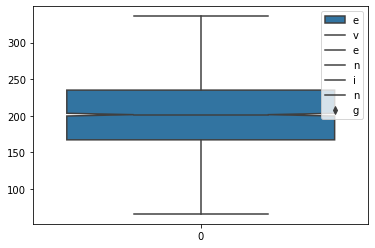

In [338]:
sns.boxplot(data=[telecom['evening_mins']],notch=True)    
plt.legend('evening_mins')

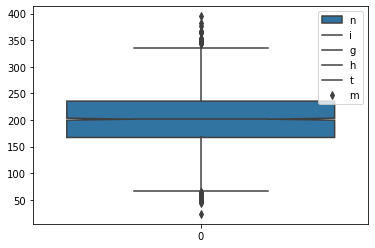

In [339]:
sns.boxplot(data=[telecom['night_mins']],notch=True)    
plt.legend('night_mins')

In [340]:
Q1 = telecom.night_mins.quantile(0.25)
Q3 = telecom.night_mins.quantile(0.75)
Q3,Q1

(235.35000000000002, 167.0)

In [341]:
IQR = Q3-Q1
IQR

68.35000000000002

In [342]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(64.47499999999997, 337.87500000000006)

In [343]:
TELE1 = telecom[(telecom.night_mins<lower_limit)|(telecom.night_mins>upper_limit)]

In [344]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
116               64                0                    0     162.6   
244              108                0                    0     198.5   
444               85                0                    0     165.4   
862               75                1                   38     163.6   
883               42                0                    0     146.3   
918               52                0                    0     215.9   
922               80                0                    0     239.9   
992               45                1                   26      91.7   
999              165                0                    0     207.7   
1072             164                1                   25     219.1   
1113             152                0                    0     206.3   
1202              86                0                    0      83.5   
1238             147                1                   24     219.9   
1260              76                1                   22     160.1   
1313             100                0                    0     235.8   
1317              89                1                   29     163.5   
1445              55                1                    8     222.5   
2321             153                0                    0     154.6   
2350             176                0                    0     169.5   
2382             123                0                    0     154.3   
2452             135                0                    0     173.4   
2609             116                1                   24     232.9   
2663             172                0                    0     169.8   
2754              96                1                   23     183.1   
2756             123                0                    0     140.0   
3024             101                0                    0     118.6   
3060              94                0                    0     212.1   
3107              73                0                    0     157.6   
3159              27                0                    0     227.4   
3247             146                0                    0     138.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
116          152.3        57.5                14.2                       1   
244          267.8       354.9                 9.4                       0   
444          196.0       349.2                 9.6                       2   
862          146.7       345.8                13.1                       3   
883          255.9        45.0                 8.0                       1   
918          217.0       342.8                 5.2                       1   
922          142.3       364.3                 9.3                       1   
992          150.6        63.3                 7.7                       1   
999          164.8        54.5                 7.9                       0   
1072         151.5        50.1                14.3                       1   
1113         292.8        43.7                10.6                       1   
1202         221.1       349.7                12.6                       0   
1238         208.5       352.5                 8.1                       3   
1260         168.7        23.2                 9.5                       3   
1313         176.0        63.6                 7.3                       2   
1317         274.8       381.9                 7.5                       2   
1445         171.5       377.5                 9.7                       1   
2321         263.0       367.7                15.5                       1   
2350         112.9        56.6                 8.7                       0   
2382         183.0        54.0                10.9                       0   
2452         222.0        64.2                13.7                       1   
2609         152.1       344.3                10.7       

In [345]:
TELE1.shape

(30, 19)

In [346]:
telecom = telecom[(telecom.night_mins>lower_limit)&(telecom.night_mins<upper_limit)]

In [347]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [348]:
telecom.shape

(3229, 19)

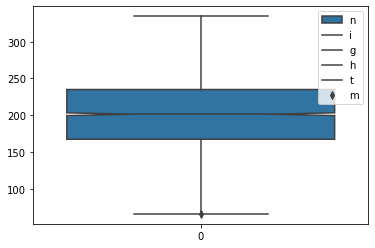

In [349]:
sns.boxplot(data=[telecom['night_mins']],notch=True)    
plt.legend('night_mins')

In [350]:
Q1 = telecom.night_mins.quantile(0.25)
Q3 = telecom.night_mins.quantile(0.75)
Q3,Q1

(235.0, 167.3)

In [351]:
IQR = Q3-Q1
IQR

67.69999999999999

In [352]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(65.75000000000003, 336.54999999999995)

In [353]:
TELE1 = telecom[(telecom.night_mins<lower_limit)|(telecom.night_mins>upper_limit)]

In [354]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
1512              22                1                   14     199.1   

      evening_mins  night_mins  international_mins  customer_service_calls  \
1512         221.8        65.7                 4.2                       1   

      international_plan  day_calls  day_charge  evening_calls  \
1512                   0        100       33.85            103   

      evening_charge  night_calls  night_charge  international_calls  \
1512           18.85           91          2.96                    1   

      international_charge  total_charge  churn  
1512                  1.13         56.79      0

In [355]:
TELE1.shape

(1, 19)

In [356]:
telecom = telecom[(telecom.night_mins>lower_limit)&(telecom.night_mins<upper_limit)]

In [357]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [358]:
telecom.shape

(3228, 19)

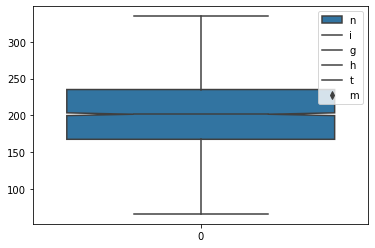

In [359]:
sns.boxplot(data=[telecom['night_mins']],notch=True)    
plt.legend('night_mins')

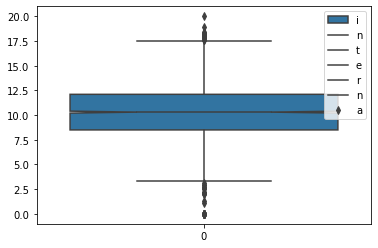

In [360]:
sns.boxplot(data=[telecom['international_mins']],notch=True)    
plt.legend('international_mins')

In [361]:
Q1 = telecom.international_mins.quantile(0.25)
Q3 = telecom.international_mins.quantile(0.75)
Q3,Q1

(12.1, 8.5)

In [362]:
IQR = Q3-Q1
IQR

3.5999999999999996

In [363]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(3.1000000000000005, 17.5)

In [364]:
TELE1 = telecom[(telecom.international_mins<lower_limit)|(telecom.international_mins>upper_limit)]

In [365]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
115               36                1                   42     196.8   
179               70                0                    0     232.1   
214               70                0                    0     226.7   
225               65                0                    0     213.4   
314              128                0                    0     125.2   
343               98                1                   21      64.6   
367               45                0                    0      78.2   
397               94                0                    0     234.4   
488              165                0                    0     242.9   
535              194                0                    0      48.4   
595               87                1                   28     151.4   
712              106                0                    0     114.4   
762              161                0                    0     189.6   
878               62                0                    0     281.0   
1028              70                0                    0     222.8   
1080             114                0                    0     191.5   
1099             157                0                    0     276.2   
1257              73                0                    0     182.3   
1400             115                0                    0     132.0   
1420              81                0                    0     149.4   
1564             137                0                    0      97.5   
1816              53                0                    0     184.8   
1966              77                0                    0     169.4   
2004              77                0                    0     175.5   
2180             121                0                    0     168.9   
2197             133                0                    0     216.2   
2229              83                1                   25     191.3   
2256              94                0                    0     207.0   
2345              98                0                    0     288.1   
2362             101                0                    0     217.7   
2371             100                0                    0     191.9   
2513              86                0                    0      70.7   
2534              81                0                    0     115.3   
2669             145                0                    0     129.4   
2733             158                0                    0     172.4   
2816             130                0                    0     263.7   
2906              87                1                   19     165.8   
2918              58                0                    0     174.4   
2933              98                0                    0     158.4   
3022             123                1                   33     146.6   
3160             123                0                    0     224.0   
3234              75                1                   28     200.6   
3275             120                1                   27     128.5   
3290             127                0                    0     107.9   
3307             172                0                    0     203.9   

      evening_mins  night_mins  international_mins  customer_service_calls  \
115          254.9       138.3                20.0                       0   
179          292.3       201.2                 0.0                       3   
214          228.1        73.2                17.6                       2   
225          234.5       250.1                 2.7                       1   
314          205.4       254.4                18.9                       0   
343          176.1       244.8                 0.0                       2   
367          253.4       255.0                18.0                       1   
397          279.3       234.2                 2.0                   

In [366]:
TELE1.shape

(45, 19)

In [367]:
telecom = telecom[(telecom.international_mins>lower_limit)&(telecom.international_mins<upper_limit)]

In [368]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [369]:
telecom.shape

(3180, 19)

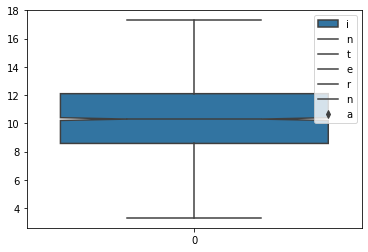

In [370]:
sns.boxplot(data=[telecom['international_mins']],notch=True)    
plt.legend('international_mins')

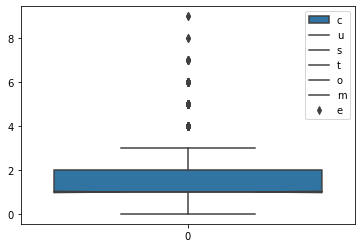

In [371]:
sns.boxplot(data=[telecom['customer_service_calls']],notch=True)    
plt.legend('customer_service_calls')

In [372]:
Q1 = telecom.customer_service_calls.quantile(0.25)
Q3 = telecom.customer_service_calls.quantile(0.75)
Q3,Q1

(2.0, 1.0)

In [373]:
IQR =Q3-Q1
IQR

1.0

In [374]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-0.5, 3.5)

In [375]:
TELE1 = telecom[(telecom.customer_service_calls<lower_limit)|(telecom.customer_service_calls>upper_limit)]

In [376]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
10                65                0                    0     129.1   
14                62                0                    0     120.7   
21                77                0                    0      62.4   
48               119                0                    0     159.1   
54                87                0                    0     151.0   
69               150                0                    0     178.9   
77               144                0                    0      61.6   
86                94                0                    0     157.9   
97                99                0                    0     198.2   
100               98                1                   21     161.2   
105               95                0                    0     238.1   
112               98                0                    0     161.0   
126              162                0                    0      70.7   
127               61                1                   27     187.5   
133               82                0                    0     200.3   
136               75                1                   21     175.8   
154               96                0                    0     260.4   
180               94                1                   23     197.1   
181              126                0                    0      58.2   
198              131                1                   26     292.9   
228              104                1                   23     280.2   
235              139                0                    0     134.4   
248               94                0                    0     181.8   
250               33                1                   29     157.4   
251              106                0                    0     207.9   
255              106                1                   32     165.9   
266              114                1                   28     225.8   
293               96                1                   37     172.7   
298              113                0                    0     215.5   
307              122                0                    0     296.4   
332               86                0                    0     128.3   
349              100                0                    0     107.0   
350               59                0                    0     182.5   
351              179                1                   38     220.1   
366              112                0                    0     193.3   
385              137                0                    0     230.2   
392               98                0                    0     206.5   
404               73                0                    0     183.4   
407              122                0                    0     157.1   
449               79                1                   21     264.3   
473               72                1                   33      96.6   
498               75                0                    0     211.3   
509              118                1                   26     170.8   
521               88                0                    0      73.3   
522              122                1                   27     253.7   
534               67                0                    0     310.4   
542              152                1                   20     237.5   
547               95                1                   41     136.8   
549              121                1                   31     237.1   
550              111                0                    0     172.8   
588              101                0                    0      89.7   
612              151                0                    0     156.4   
627               87                0                    0     256.2   
635              120                1                   27     153.5   
655               79                0         

In [377]:
TELE1.shape

(259, 19)

In [378]:
telecom = telecom[(telecom.customer_service_calls>lower_limit)&(telecom.customer_service_calls<upper_limit)]

In [379]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [380]:
telecom.shape

(2921, 19)

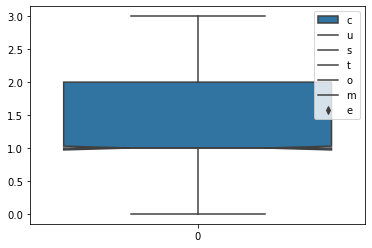

In [381]:
sns.boxplot(data=[telecom['customer_service_calls']],notch=True)    
plt.legend('customer_service_calls')

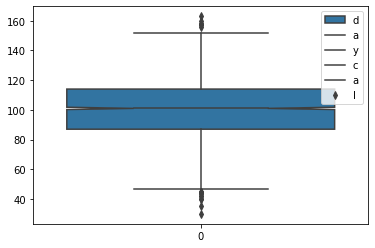

In [382]:
sns.boxplot(data=[telecom['day_calls']],notch=True)    
plt.legend('day_calls')

In [383]:
Q1 = telecom.day_calls.quantile(0.25)
Q3 = telecom.day_calls.quantile(0.75)
Q3,Q1

(114.0, 87.0)

In [384]:
IQR = Q3-Q1
IQR

27.0

In [385]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(46.5, 154.5)

In [386]:
TELE1 = telecom[(telecom.day_calls<lower_limit)|(telecom.day_calls>upper_limit)]

In [387]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
315               39                0                    0      60.4   
468               86                1                   32      70.9   
740               67                1                   20     230.6   
1057              86                1                   38     123.0   
1144             155                0                    0     216.7   
1322               2                0                    0     132.1   
1346             106                0                    0     133.7   
1422             107                1                   31     160.3   
1460              80                0                    0     198.1   
1869             101                0                    0     239.0   
1989             124                1                   30     144.5   
2217             137                1                   22     189.6   
2392              90                0                    0     125.4   
2394              57                0                    0     189.3   
2492              73                0                    0     203.3   
2884             170                0                    0     285.7   
2885             135                0                    0     190.9   
2964              99                0                    0     256.4   
3187              58                1                   39     211.9   

      evening_mins  night_mins  international_mins  customer_service_calls  \
315          306.2       123.9                12.4                       1   
468          166.7       244.9                11.1                       3   
740          189.1       162.2                 9.4                       1   
1057         133.9       138.2                13.3                       1   
1144         144.3       135.3                10.8                       2   
1322         138.9       192.6                 9.1                       2   
1346         187.8       181.9                10.7                       1   
1422         221.5       261.6                 5.6                       1   
1460         156.7       182.1                 9.3                       3   
1869         273.0       278.2                13.5                       1   
1989         262.3       226.5                12.0                       2   
2217         179.0       179.6                11.4                       2   
2392         269.1       238.6                11.0                       1   
2394         174.9       221.9                11.2                       3   
2492         141.9       200.7                 8.5                       0   
2884         167.5       260.0                 8.7                       1   
2885         161.4       231.9                 8.4                       1   
2964         214.5       233.7                 7.9                       3   
3187         274.4       210.5                 5.4                       1   

      international_plan  day_calls  day_charge  evening_calls  \
315                    0        158       10.27            120   
468                    0        163       12.05            121   
740                    0         40       39.20             58   
1057                   0        158       20.91            119   
1144                   0         30       36.84            125   
1322                   1         42       22.46             88   
1346                   1         45       22.73            107   
1422                   0         45       27.25             70   
1460                   0        160       33.68             87   
1869                   0        156       40.63            106   
1989                   0         35       24.57            101   
2217                   0         42       32.23            137   
2392                   0        158       21.32             83   
2394                   0        157       32.18             70   
2492          

In [388]:
TELE1.shape

(19, 19)

In [389]:
telecom = telecom[(telecom.day_calls>lower_limit)&(telecom.day_calls<upper_limit)]

In [390]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [391]:
telecom.shape

(2902, 19)

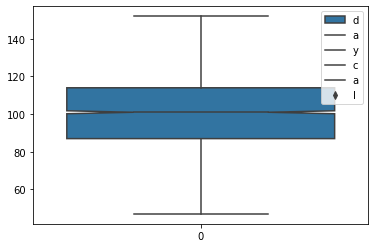

In [392]:
sns.boxplot(data=[telecom['day_calls']],notch=True)    
plt.legend('day_calls')

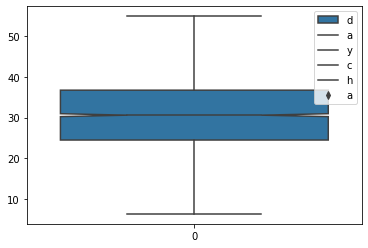

In [393]:
sns.boxplot(data=[telecom['day_charge']],notch=True)    
plt.legend('day_charge')

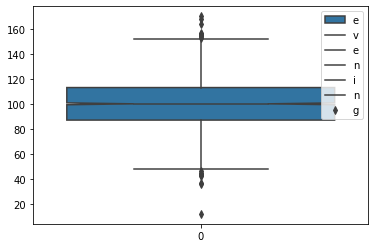

In [394]:
sns.boxplot(data=[telecom['evening_calls']],notch=True)    
plt.legend('evening_calls')

In [395]:
Q1 = telecom.evening_calls.quantile(0.25)
Q3 = telecom.evening_calls.quantile(0.75)
Q3,Q1

(113.0, 87.0)

In [396]:
IQR = Q3-Q1
IQR

26.0

In [397]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(48.0, 152.0)

In [398]:
TELE1 = telecom[(telecom.evening_calls<lower_limit)|(telecom.evening_calls>upper_limit)]

In [399]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
58                68                0                    0     148.8   
301              127                0                    0     266.6   
475               74                0                    0     148.5   
646              153                1                   28     235.6   
960                5                0                    0     199.2   
1020             115                1                   33     145.0   
1071             134                0                    0     205.3   
1266              42                0                    0     155.4   
1615              74                0                    0     157.1   
1706              54                0                    0     273.8   
1730             161                0                    0     107.5   
1856              86                0                    0     171.8   
1876              46                0                    0     164.2   
2063              90                0                    0     114.4   
2227              41                0                    0     237.8   
2853             105                1                   21     147.0   
2937              96                1                   40     108.6   
3121              98                0                    0     169.9   
3219             150                1                   35     139.6   

      evening_mins  night_mins  international_mins  customer_service_calls  \
58           246.5       129.8                12.1                       3   
301          264.8       207.2                 5.9                       1   
475          146.5       289.2                 9.9                       3   
646          227.9       170.3                15.4                       0   
960          187.3       214.0                13.3                       3   
1020         194.5       242.3                14.2                       2   
1071         240.5       179.1                 5.0                       1   
1266         164.1       157.7                 9.0                       0   
1615         213.1       280.4                 7.6                       2   
1706         119.6       267.6                11.7                       1   
1730         256.4       247.2                12.6                       2   
1856         301.7       139.4                 9.7                       1   
1876         196.2       236.1                 8.1                       1   
2063         127.7       253.1                10.1                       2   
2227         223.5       217.4                10.2                       2   
2853         197.3       267.4                 8.7                       2   
2937         206.4       126.3                13.4                       0   
3121         138.3       142.6                 8.5                       1   
3219         332.8       213.8                 8.8                       2   

      international_plan  day_calls  day_charge  evening_calls  \
58                     0         70       25.30            164   
301                    0        106       45.32            168   
475                    0        111       25.25             42   
646                    0         74       40.05             37   
960                    0        106       33.86             12   
1020                   0         72       24.65            157   
1071                   0        122       34.90            155   
1266                   0        127       26.42             45   
1615                   0         95       26.71             36   
1706                   0        113       46.55            156   
1730                   0        121       18.28             46   
1856                   0        106       29.21             44   
1876                   0        116       27.91            153   
2063                   0        122       19.45            154   
2227          

In [400]:
TELE1.shape

(19, 19)

In [401]:
telecom = telecom[(telecom.evening_calls>lower_limit)&(telecom.evening_calls<upper_limit)]

In [402]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [403]:
telecom.shape

(2872, 19)

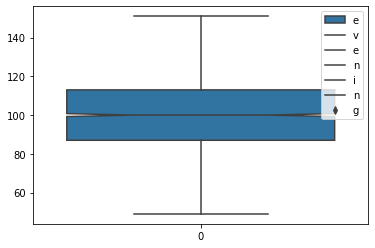

In [404]:
sns.boxplot(data=[telecom['evening_calls']],notch=True)    
plt.legend('evening_calls')

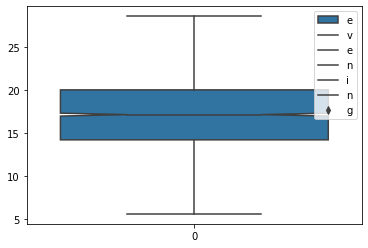

In [405]:
sns.boxplot(data=[telecom['evening_charge']],notch=True)    
plt.legend('evening_charge')

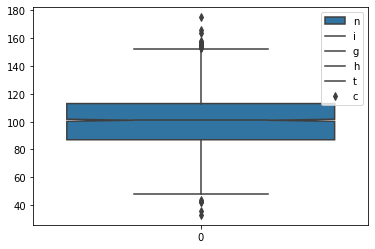

In [406]:
sns.boxplot(data=[telecom['night_calls']],notch=True)    
plt.legend('night_calls')

In [407]:
Q1 = telecom.night_calls.quantile(0.25)
Q3 = telecom.night_calls.quantile(0.75)
Q3,Q1

(113.0, 87.0)

In [408]:
IQR = Q3-Q1
IQR

26.0

In [409]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(48.0, 152.0)

In [410]:
TELE1 = telecom[(telecom.night_calls<lower_limit)|(telecom.night_calls>upper_limit)]

In [411]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
326              121                1                   35      68.7   
335              151                1                   17     214.7   
395               98                1                   22     278.3   
429               49                0                    0     119.4   
493              129                1                   33     119.6   
586               90                0                    0     221.8   
901               23                0                    0     321.6   
1109             118                0                    0     140.4   
1200             100                1                   25     215.9   
1296              79                0                    0     213.6   
1748              71                1                   23     175.7   
1810             124                0                    0     194.0   
2288              34                0                    0     193.7   
2659              15                0                    0     121.1   
2728              86                0                    0     148.2   
2988             105                0                    0     259.3   
3172              41                0                    0     223.8   
3211             103                0                    0      70.9   

      evening_mins  night_mins  international_mins  customer_service_calls  \
326          209.2       197.4                11.4                       1   
335          138.5       169.1                 8.6                       1   
395           93.4       107.6                 9.7                       0   
429          273.3       214.4                12.4                       2   
493          278.7       263.4                 5.9                       2   
586          203.8       215.8                 8.4                       1   
901          251.6       141.1                11.3                       2   
1109         187.1       207.9                 7.9                       0   
1200         257.9       180.2                11.6                       1   
1296         234.9       229.6                 8.8                       2   
1748         258.9       268.4                14.1                       1   
1810         241.0       227.5                11.9                       0   
2288         126.9       221.2                 8.8                       0   
2659         216.0       235.1                16.1                       2   
2728         285.1       166.4                 6.2                       2   
2988         175.2       222.4                12.0                       3   
3172         244.8       223.8                12.3                       3   
3211         134.5       168.8                12.0                       2   

      international_plan  day_calls  day_charge  evening_calls  \
326                    0         95       11.68             69   
335                    0         97       36.50             90   
395                    0         89       47.31            143   
429                    0         69       20.30             92   
493                    0        104       20.33             88   
586                    1         97       37.71            134   
901                    0        107       54.67            115   
1109                   0        112       23.87             60   
1200                   0         90       36.70             92   
1296                   0        110       36.31            121   
1748                   0         82       29.87            136   
1810                   0        103       32.98            116   
2288                   0         74       32.93             84   
2659                   0        130       20.59             86   
2728                   0         71       25.19             91   
2988                   0         96       44.08             97   
3172                   0        

In [412]:
TELE1.shape

(18, 19)

In [413]:
telecom = telecom[(telecom.night_calls>lower_limit)&(telecom.night_calls<upper_limit)]

In [414]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [415]:
telecom.shape

(2851, 19)

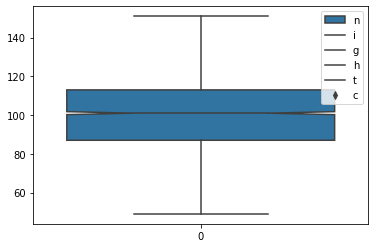

In [416]:
sns.boxplot(data=[telecom['night_calls']],notch=True)    
plt.legend('night_calls')

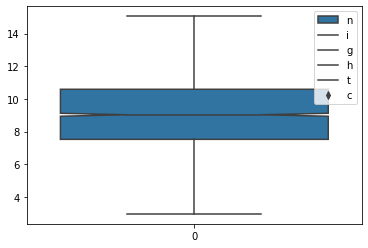

In [417]:
sns.boxplot(data=[telecom['night_charge']],notch=True)    
plt.legend('night_charge')

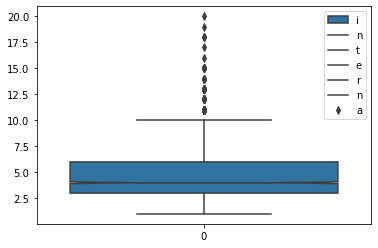

In [418]:
sns.boxplot(data=[telecom['international_calls']],notch=True)    
plt.legend('international_calls')

In [419]:
Q1 = telecom.international_calls.quantile(0.25)
Q3 = telecom.international_calls.quantile(0.75)
Q3,Q1

(6.0, 3.0)

In [420]:
IQR = Q3-Q1
IQR

3.0

In [421]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(-1.5, 10.5)

In [422]:
TELE1 = telecom[(telecom.international_calls<lower_limit)|(telecom.international_calls>upper_limit)]

In [423]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
22               130                0                    0     183.0   
41               135                1                   41     173.1   
153               56                0                    0     226.0   
182               67                1                   36     115.6   
185               73                0                    0     214.3   
211              144                0                    0     203.5   
219              106                0                    0     223.0   
272               49                1                   28     214.4   
329              158                0                    0     205.2   
341              101                0                    0     183.9   
347              162                0                    0     220.6   
377               79                0                    0     205.7   
420              141                1                   28     206.9   
474              139                1                   20     214.6   
483              117                0                    0     149.9   
504               80                0                    0     206.3   
514               60                1                   29     265.9   
636              121                0                    0     150.7   
642               83                0                    0     195.0   
674              119                0                    0     176.8   
698               37                0                    0     206.0   
723               78                0                    0     137.4   
756               33                0                    0     213.9   
837               64                1                   33     127.2   
842               67                0                    0     120.9   
854              120                1                   24     212.7   
863               45                0                    0     207.6   
921               65                0                    0     111.0   
957              144                0                    0     150.0   
982               84                1                   33     159.1   
1021              67                0                    0     167.8   
1092             148                0                    0     185.2   
1168             143                0                    0     155.5   
1179             101                1                   23     262.2   
1323             111                0                    0     197.1   
1333               7                1                   30     221.4   
1355              50                1                   31     302.7   
1392             101                0                    0     269.7   
1419              65                0                    0     105.7   
1526             155                1                   23     243.9   
1567              94                0                    0      85.9   
1581              91                1                   34     175.3   
1657             136                0                    0     142.3   
1797              92                1                   47     141.6   
1832              68                0                    0     195.4   
1889              91                0                    0     153.0   
2018             153                1                   22     167.7   
2156              75                0                    0     224.7   
2212               8                1                   36     242.9   
2269             138                1                   37      75.8   
2562             110                0                    0     208.0   
2576              57                1                   33     193.4   
2703             162                0                    0      49.2   
2724             182                0                    0     279.1   
2775             120                1         

In [424]:
TELE1.shape

(70, 19)

In [425]:
telecom = telecom[(telecom.international_calls>lower_limit)&(telecom.international_calls<upper_limit)]

In [426]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [427]:
telecom.shape

(2781, 19)

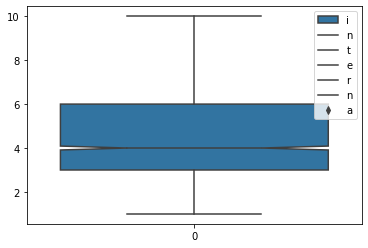

In [428]:
sns.boxplot(data=[telecom['international_calls']],notch=True)    
plt.legend('international_calls')

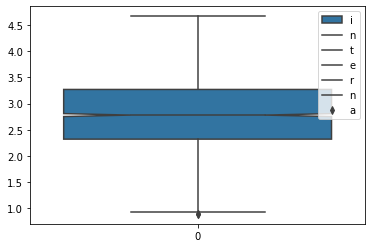

In [429]:
sns.boxplot(data=[telecom['international_charge']],notch=True)    
plt.legend('international_charge')

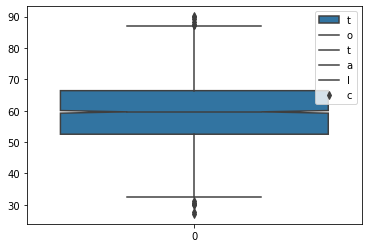

In [430]:
sns.boxplot(data=[telecom['total_charge']],notch=True)    
plt.legend('total_charge')

In [431]:
Q1 = telecom.total_charge.quantile(0.25)
Q3 = telecom.total_charge.quantile(0.75)
Q3,Q1

(66.39, 52.5)

In [432]:
IQR = Q3-Q1
IQR

13.89

In [433]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(31.665, 87.225)

In [434]:
TELE1 = telecom[(telecom.total_charge<lower_limit)|(telecom.total_charge>upper_limit)]

In [435]:
TELE1

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
289               89                0                    0     303.9   
523               61                0                    0      45.0   
648              131                1                   39      69.1   
914              179                0                    0     287.3   
1645              95                1                   36     283.1   
1687              90                0                    0      37.8   
2241              56                1                   29      37.7   
2629             141                1                   32     322.4   
2696              74                0                    0     314.1   
2707              46                0                    0      40.4   
2859              87                0                    0      58.0   
2996             113                1                   34      44.9   
3132             161                0                    0     322.3   
3205             111                0                    0     294.7   

      evening_mins  night_mins  international_mins  customer_service_calls  \
289          260.9       312.1                 5.3                       1   
523          151.3       152.9                 9.8                       2   
648          101.3       104.8                 9.1                       0   
914          288.0       266.0                10.5                       0   
1645         286.2       261.7                11.3                       3   
1687         155.3       175.0                14.2                       3   
2241         144.1       226.6                 4.9                       1   
2629         283.2       209.5                 6.7                       1   
2696         222.4       259.0                12.3                       3   
2707         172.4       145.1                 9.0                       2   
2859          67.5       185.9                11.5                       0   
2996         134.2       168.4                13.3                       1   
3132         230.4       241.5                 7.8                       2   
3205         294.6       260.1                10.8                       1   

      international_plan  day_calls  day_charge  evening_calls  \
289                    0         95       51.66            114   
523                    0        108        7.65             74   
648                    0        122       11.75            136   
914                    0        123       48.84            114   
1645                   0        112       48.13             86   
1687                   0         80        6.43            105   
2241                   0        115        6.41            111   
2629                   0         92       54.81            107   
2696                   0         86       53.40             99   
2707                   0        105        6.87             83   
2859                   0        125        9.86            116   
2996                   0         63        7.63             82   
3132                   0        100       54.79            135   
3205                   0         90       50.10             72   

      evening_charge  night_calls  night_charge  international_calls  \
289            22.18           89         14.04                    3   
523            12.86           94          6.88                    6   
648             8.61           94          4.72                    4   
914            24.48          112         11.97                    4   
1645           24.33          129         11.78                    3   
1687           13.20          111          7.88                    5   
2241           12.25          101         10.20                    3   
2629           24.07          111          9.43                    3   
2696           18.90          121         11.66                    5   
2707           14.65           89          

In [436]:
TELE1.shape

(14, 19)

In [437]:
telecom = telecom[(telecom.total_charge>lower_limit)&(telecom.total_charge<upper_limit)]

In [438]:
telecom

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
4                 75                0                    0     166.7   
5                118                0                    0     223.4   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
4            148.3       186.9                10.1                       3   
5            220.6       203.9                 6.3                       0   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [439]:
telecom.shape

(2767, 19)

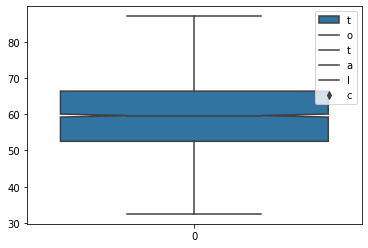

In [440]:
sns.boxplot(data=[telecom['total_charge']],notch=True)    
plt.legend('total_charge')

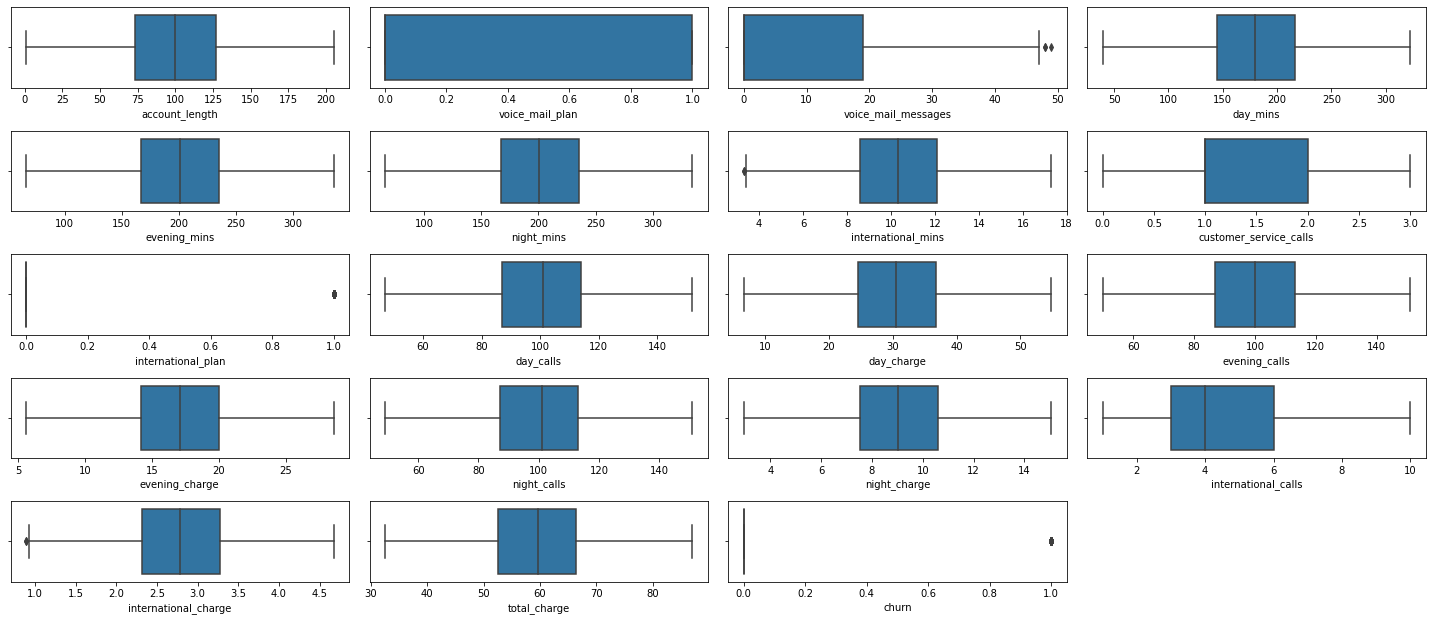

In [441]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (20, 10))
x = 1 

for column in telecom.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(telecom[column])
    x+=1
    
plt.tight_layout()

In [442]:
telecom.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     2767.000000      2767.000000          2767.000000  2767.000000   
mean       100.414167         0.276834             8.083484   180.049837   
std         39.350527         0.447515            13.651373    51.913356   
min          1.000000         0.000000             0.000000    39.500000   
25%         73.000000         0.000000             0.000000   144.200000   
50%        100.000000         0.000000             0.000000   179.900000   
75%        127.000000         1.000000            19.000000   216.000000   
max        205.000000         1.000000            49.000000   322.500000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   2767.000000  2767.000000         2767.000000             2767.000000   
mean     201.211420   201.073690           10.315685                1.303939   
std       48.880722    48.780687            2.597333                0.975363   
min       66.000000    65.800000            3.300000                0.000000   
25%      167.200000   167.400000            8.600000                1.000000   
50%      201.300000   200.900000           10.300000                1.000000   
75%      235.050000   235.500000           12.100000                2.000000   
max      336.000000   334.700000           17.300000                3.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         2767.000000  2767.000000  2767.000000    2767.000000   
mean             0.096133   100.561980    30.609006      99.970726   
std              0.294827    19.298743     8.825203      18.929567   
min              0.000000    47.000000     6.720000      50.000000   
25%              0.000000    87.000000    24.510000      87.000000   
50%              0.000000   101.000000    30.580000     100.000000   
75%              0.000000   114.000000    36.720000     113.000000   
max              1.000000   152.000000    54.830000     151.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     2767.000000  2767.000000   2767.000000          2767.000000   
mean        17.103209   100.011926      9.048363             4.316950   
std          4.154930    19.043226      2.195198             2.078975   
min          5.610000    49.000000      2.960000             1.000000   
25%         14.210000    87.000000      7.535000             3.000000   
50%         17.110000   101.000000      9.040000             4.000000   
75%         19.980000   113.000000     10.600000             6.000000   
max         28.560000   151.000000     15.060000            10.000000   

       international_charge  total_charge        churn  
count           2767.000000   2767.000000  2767.000000  
mean               2.785750     59.546328     0.106975  
std                0.701195      9.930431     0.309137  
min                0.890000     32.490000     0.000000  
25%                2.320000     52.520000     0.000000  
50%                2.780000     59.630000     0.000000  
75%                3.270000     66.375000     0.000000  
max                4.670000     87.030000     1.000000

In [443]:
telecom.corr()

account_length  voice_mail_plan  voice_mail_messages  \
account_length                1.000000         0.008761            -0.000243   
voice_mail_plan               0.008761         1.000000             0.957216   
voice_mail_messages          -0.000243         0.957216             1.000000   
day_mins                      0.001176         0.000557             0.006470   
evening_mins                 -0.016734         0.012215             0.008339   
night_mins                   -0.006494         0.011367             0.017373   
international_mins            0.024226         0.000400             0.003682   
customer_service_calls       -0.003564        -0.034636            -0.030443   
international_plan            0.021029         0.006473             0.010761   
day_calls                     0.042219        -0.015216            -0.013079   
day_charge                    0.001175         0.000555             0.006466   
evening_calls                 0.021896        -0.013383            -0.014710   
evening_charge               -0.016716         0.012226             0.008354   
night_calls                  -0.004473         0.010091             0.000406   
night_charge                 -0.006504         0.011347             0.017353   
international_calls           0.024163        -0.015459            -0.009391   
international_charge          0.024259         0.000444             0.003717   
total_charge                 -0.005675         0.008149             0.013340   
churn                         0.009849        -0.096543            -0.084187   

                        day_mins  evening_mins  night_mins  \
account_length          0.001176     -0.016734   -0.006494   
voice_mail_plan         0.000557      0.012215    0.011367   
voice_mail_messages     0.006470      0.008339    0.017373   
day_mins                1.000000     -0.012694   -0.007430   
evening_mins           -0.012694      1.000000   -0.022057   
night_mins             -0.007430     -0.022057    1.000000   
international_mins     -0.009153     -0.017408   -0.002193   
customer_service_calls -0.010863     -0.032973   -0.017483   
international_plan      0.056647      0.001916   -0.026302   
day_calls               0.012006     -0.013263    0.024354   
day_charge              1.000000     -0.012689   -0.007435   
evening_calls           0.011495     -0.016585    0.014460   
evening_charge         -0.012706      1.000000   -0.022069   
night_calls             0.002391     -0.009333   -0.002905   
night_charge           -0.007438     -0.022073    0.999999   
international_calls    -0.019226      0.019041    0.014158   
international_charge   -0.009178     -0.017458   -0.002169   
total_charge            0.881094      0.401015    0.205064   
churn                   0.284163      0.133102    0.050686   

                        international_mins  customer_service_calls  \
account_length                    0.024226               -0.003564   
voice_mail_plan                   0.000400               -0.034636   
voice_mail_messages               0.003682               -0.030443   
day_mins                         -0.009153               -0.010863   
evening_mins                     -0.017408               -0.032973   
night_mins                       -0.002193               -0.017483   
international_mins                1.000000               -0.014855   
customer_service_calls           -0.014855                1.000000   
international_plan                0.039152               -0.033754   
day_calls                         0.006240               -0.031204   
day_charge                       -0.009152               -0.010871   
evening_calls                     0.000959               -0.019040   
evening_charge                   -0.017418               -0.032970   
night_calls                       0.000483                0.003737   
night_charge                     -0.002200               -0.017490   
international_calls              -0.002997                0.02

In [444]:
telecom.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

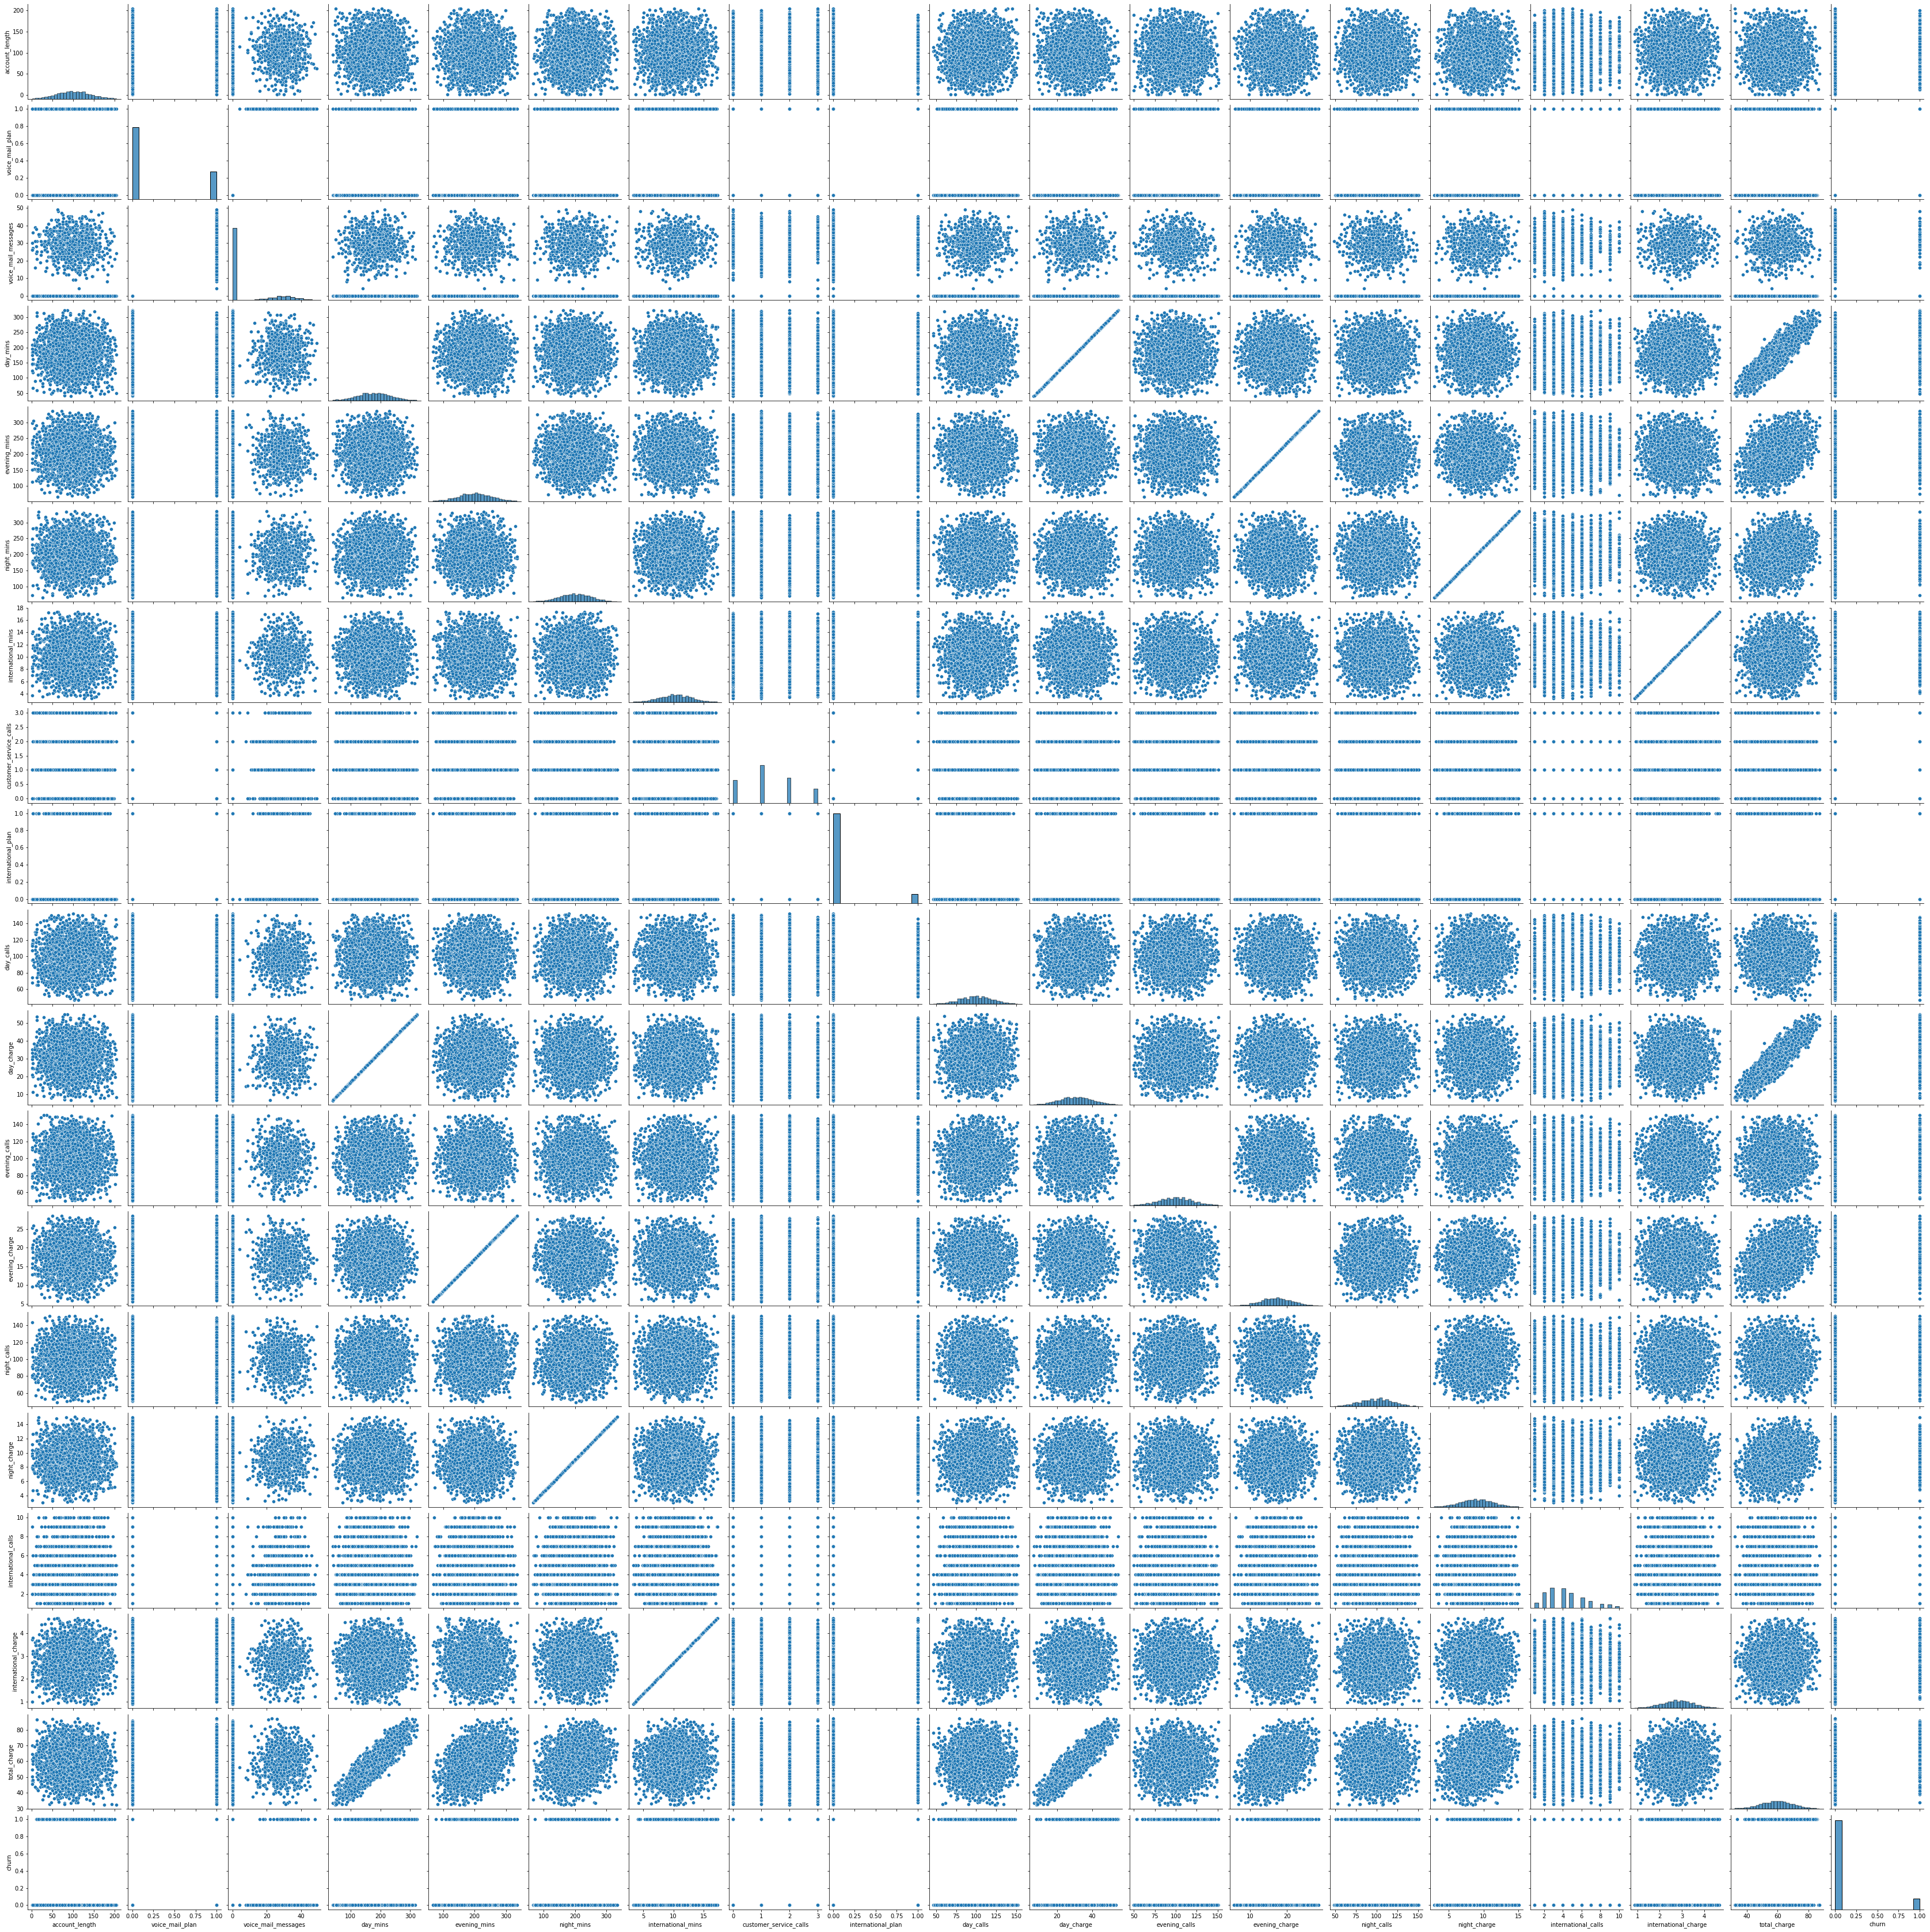

In [445]:
sns.pairplot(telecom)

<Figure size 2880x2160 with 0 Axes>

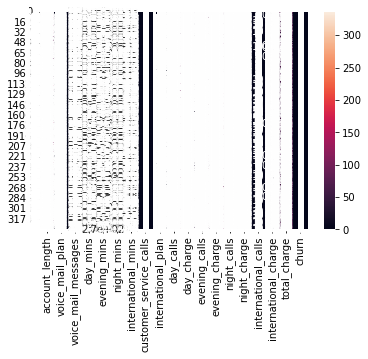

<Figure size 2880x2160 with 0 Axes>

In [446]:
sns.heatmap(telecom,annot=True)
plt.figure(figsize=(40,30))

<function matplotlib.pyplot.show(close=None, block=None)>

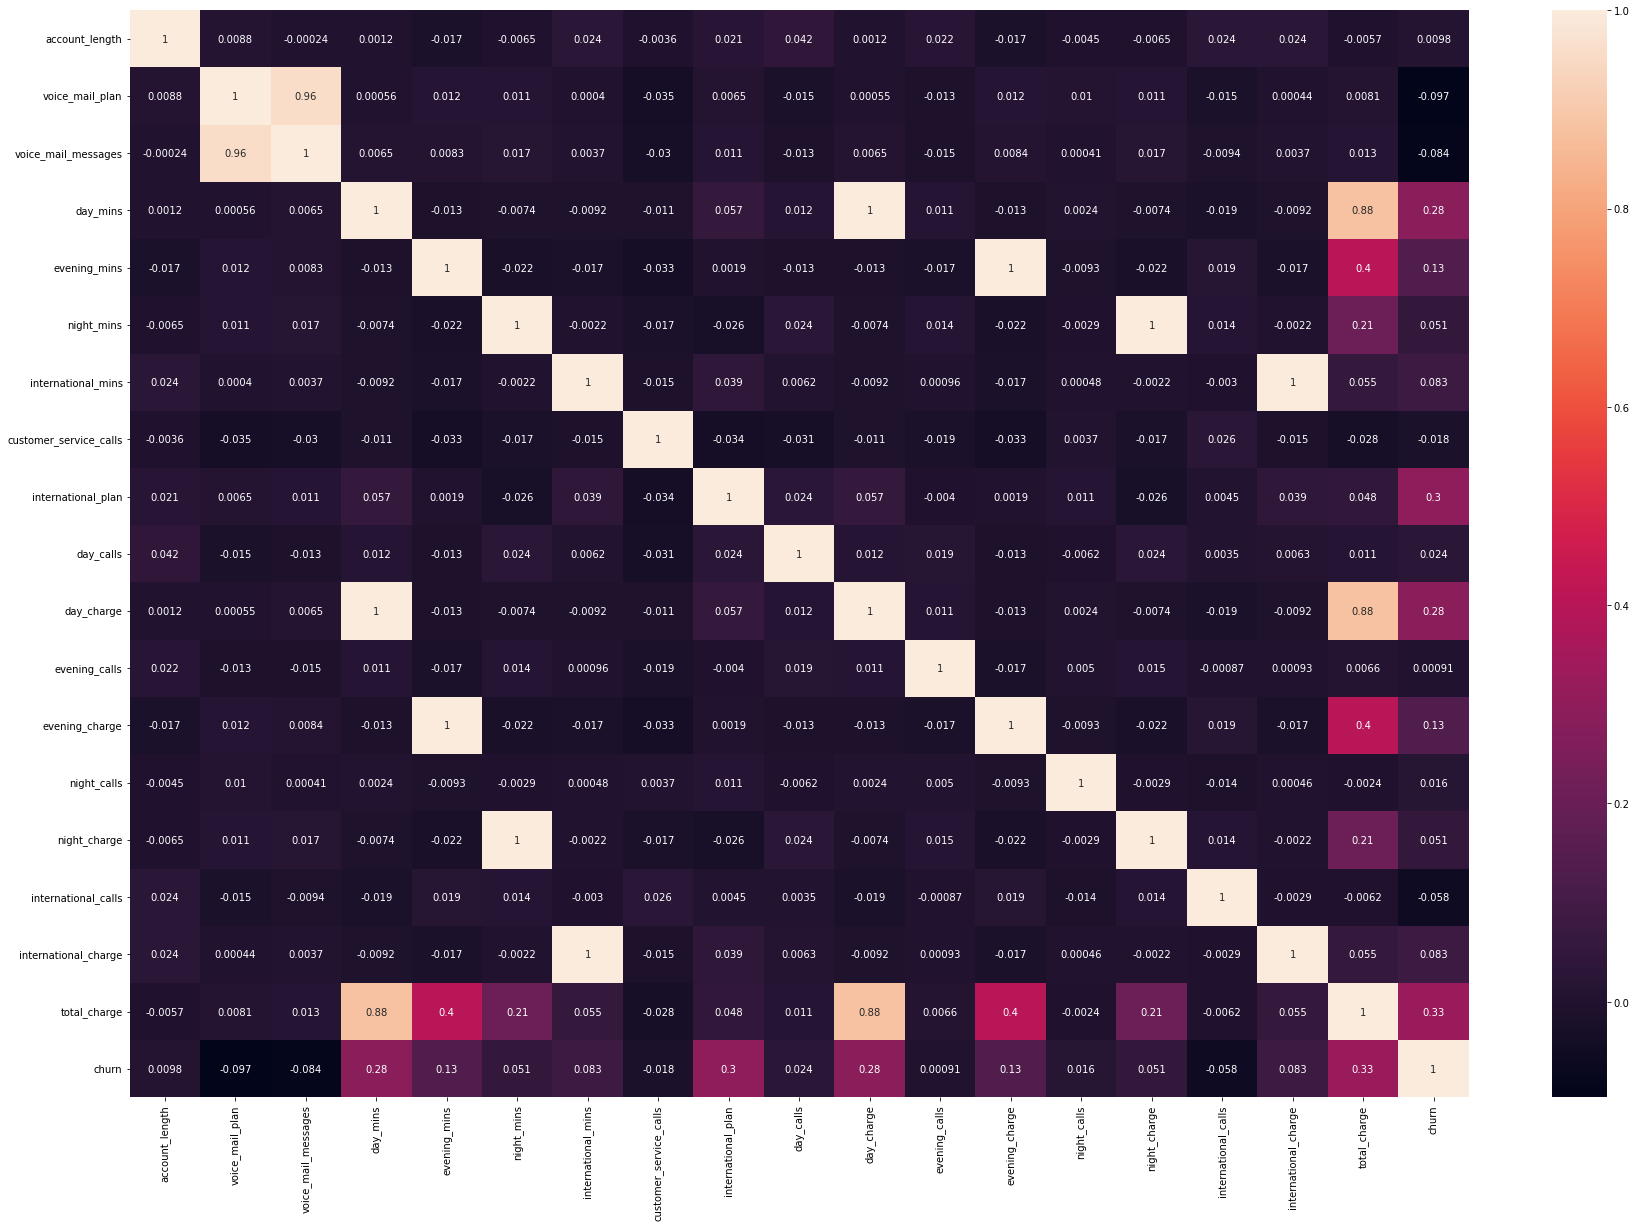

In [447]:
plt.figure(figsize=(30,20))
correlation_matrix =telecom.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show       

In [448]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [449]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(telecom.iloc[:,1:])
df_norm

voice_mail_plan  voice_mail_messages  day_mins  evening_mins  \
0                 1.0             0.510204  0.797173      0.486667   
1                 1.0             0.530612  0.431449      0.479630   
2                 0.0             0.000000  0.720495      0.204444   
4                 0.0             0.000000  0.449470      0.304815   
5                 0.0             0.000000  0.649823      0.572593   
...               ...                  ...       ...           ...   
3328              1.0             0.734694  0.412367      0.553704   
3329              0.0             0.000000  0.677032      0.323704   
3330              0.0             0.000000  0.499293      0.825185   
3331              0.0             0.000000  0.615901      0.346667   
3332              1.0             0.510204  0.688693      0.740370   

      night_mins  international_mins  customer_service_calls  \
0       0.665303            0.478571                0.333333   
1       0.701376            0.742857                0.333333   
2       0.359985            0.635714                0.000000   
4       0.450353            0.485714                1.000000   
5       0.513574            0.214286                0.000000   
...          ...                 ...                     ...   
3328    0.793232            0.471429                0.666667   
3329    0.466716            0.450000                1.000000   
3330    0.468948            0.771429                0.666667   
3331    0.272964            0.121429                0.666667   
3332    0.653031            0.742857                0.000000   

      international_plan  day_calls  day_charge  evening_calls  \
0                    0.0   0.600000    0.797132       0.485149   
1                    0.0   0.723810    0.431303       0.524752   
2                    0.0   0.638095    0.720432       0.594059   
4                    1.0   0.628571    0.449387       0.712871   
5                    1.0   0.485714    0.649761       0.504950   
...                  ...        ...         ...            ...   
3328                 0.0   0.285714    0.412180       0.752475   
3329                 0.0   0.095238    0.676990       0.049505   
3330                 0.0   0.590476    0.499273       0.079208   
3331                 1.0   0.552381    0.615880       0.336634   
3332                 0.0   0.628571    0.688630       0.316832   

      evening_charge  night_calls  night_charge  international_calls  \
0           0.486710     0.411765      0.665289             0.222222   
1           0.479739     0.529412      0.701653             0.222222   
2           0.204357     0.539216      0.360331             0.444444   
4           0.305011     0.705882      0.450413             0.222222   
5           0.572549     0.676471      0.514050             0.555556   
...              ...          ...           ...                  ...   
3328        0.553813     0.333333      0.793388             0.555556   
3329        0.323747     0.725490      0.466942             0.333333   
3330        0.825272     0.411765      0.469421             0.555556   
3331        0.346841     0.862745      0.272727             1.000000   
3332        0.740305     0.274510      0.652893             0.333333   

      international_charge  total_charge  churn  
0                 0.478836      0.789696    0.0  
1                 0.743386      0.490466    0.0  
2                 0.634921      0.546388    0.0  
4                 0.486772      0.359369    0.0  
5                 0.214286      0.643931    0.0  
...                    ...           ...    ...  
3328              0.470899      0.506234    0.0  
3329              0.449735      0.569124    0.0  
3330              0.772487      0.646315    0.0  
3331              0.121693      0.459113    0.0  
3332              0.743386      0.816282    0.0  

[2767 rows x 18 columns]

In [450]:
#Spliting the data into X and Y 
X = telecom.drop('churn', axis = 1)
Y = telecom["churn"]

In [451]:
X=telecom.drop('account_length',axis=1)

In [452]:
X

voice_mail_plan  voice_mail_messages  day_mins  evening_mins  \
0                   1                   25     265.1         197.4   
1                   1                   26     161.6         195.5   
2                   0                    0     243.4         121.2   
4                   0                    0     166.7         148.3   
5                   0                    0     223.4         220.6   
...               ...                  ...       ...           ...   
3328                1                   36     156.2         215.5   
3329                0                    0     231.1         153.4   
3330                0                    0     180.8         288.8   
3331                0                    0     213.8         159.6   
3332                1                   25     234.4         265.9   

      night_mins  international_mins  customer_service_calls  \
0          244.7                10.0                       1   
1          254.4                13.7                       1   
2          162.6                12.2                       0   
4          186.9                10.1                       3   
5          203.9                 6.3                       0   
...          ...                 ...                     ...   
3328       279.1                 9.9                       2   
3329       191.3                 9.6                       3   
3330       191.9                14.1                       2   
3331       139.2                 5.0                       2   
3332       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      0  
3332                  3.70         77.01      0  

[2767 rows x 18 columns]

In [453]:
Y

0       0
1       0
2       0
4       0
5       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 2767, dtype: int64

In [454]:
X.columns

Index(['voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins',
       'night_mins', 'international_mins', 'customer_service_calls',
       'international_plan', 'day_calls', 'day_charge', 'evening_calls',
       'evening_charge', 'night_calls', 'night_charge', 'international_calls',
       'international_charge', 'total_charge', 'churn'],
      dtype='object')

In [455]:
X.shape

(2767, 18)

In [456]:
Y.shape

(2767,)

In [457]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [458]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Check which algorithm is best Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998190 (0.003001)
KNN: 0.917741 (0.017448)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.890200 (0.017717)


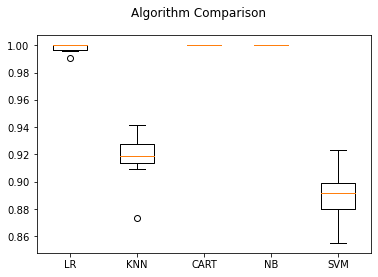

In [459]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [460]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 1.000000 (0.000000)
ScaledKNN: 0.995932 (0.003758)
ScaledCART: 1.000000 (0.000000)
ScaledNB: 1.000000 (0.000000)
ScaledSVM: 1.000000 (0.000000)


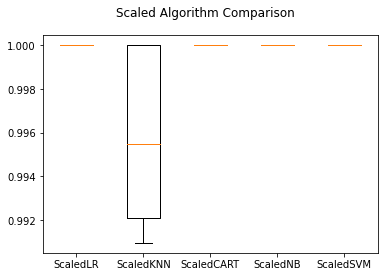

In [461]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [462]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=None)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

Best: 0.998192 using {'n_neighbors': 1}


In [463]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [464]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.998192 (0.002214) with: {'n_neighbors': 1}
0.998192 (0.002214) with: {'n_neighbors': 3}
0.996384 (0.003385) with: {'n_neighbors': 5}
0.994124 (0.005371) with: {'n_neighbors': 7}
0.993223 (0.005804) with: {'n_neighbors': 9}
0.991865 (0.005645) with: {'n_neighbors': 11}
0.990960 (0.004959) with: {'n_neighbors': 13}
0.989605 (0.004977) with: {'n_neighbors': 15}
0.988702 (0.005056) with: {'n_neighbors': 17}
0.987347 (0.005646) with: {'n_neighbors': 19}
0.986896 (0.006211) with: {'n_neighbors': 21}


In [465]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

#c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0,2.2,2.5]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(kernel=kernel_values)  #Regularization parameter. The strength of the regularization is inversely proportional to C
model = SVC()


kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" %
      (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'kernel': 'linear'}


In [466]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [467]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1.000000 (0.000000) with: {'kernel': 'linear'}
1.000000 (0.000000) with: {'kernel': 'poly'}
1.000000 (0.000000) with: {'kernel': 'rbf'}
1.000000 (0.000000) with: {'kernel': 'sigmoid'}


Apply Ensemble Methods

In [468]:
# ensembles
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model,
                                 X_train,
                                 Y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 1.000000 (0.000000)
GBM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
ET: 1.000000 (0.000000)


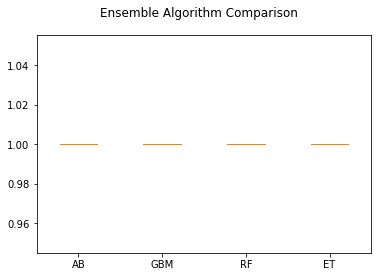

In [469]:
# Compare Ensemble Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Finalize Model

In [470]:
#Spliting the data into X and Y 
X = telecom.drop('churn', axis = 1)
Y = telecom["churn"]

In [471]:
X=telecom.drop('account_length',axis=1)

In [472]:
X

voice_mail_plan  voice_mail_messages  day_mins  evening_mins  \
0                   1                   25     265.1         197.4   
1                   1                   26     161.6         195.5   
2                   0                    0     243.4         121.2   
4                   0                    0     166.7         148.3   
5                   0                    0     223.4         220.6   
...               ...                  ...       ...           ...   
3328                1                   36     156.2         215.5   
3329                0                    0     231.1         153.4   
3330                0                    0     180.8         288.8   
3331                0                    0     213.8         159.6   
3332                1                   25     234.4         265.9   

      night_mins  international_mins  customer_service_calls  \
0          244.7                10.0                       1   
1          254.4                13.7                       1   
2          162.6                12.2                       0   
4          186.9                10.1                       3   
5          203.9                 6.3                       0   
...          ...                 ...                     ...   
3328       279.1                 9.9                       2   
3329       191.3                 9.6                       3   
3330       191.9                14.1                       2   
3331       139.2                 5.0                       2   
3332       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
4                      1        113       28.34            122   
5                      1         98       37.98            101   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
4              12.61          121          8.41                    3   
5              18.75          118          9.18                    6   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
4                     2.73         52.09      0  
5                     1.70         67.61      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      0  
3332                  3.70         77.01      0  

[2767 rows x 18 columns]

In [473]:
Y

0       0
1       0
2       0
4       0
5       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 2767, dtype: int64

In [474]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [475]:

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(kernel='rbf')
model.fit(rescaledX, Y_train)

SVC()

In [476]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [477]:
print(accuracy_score(Y_validation, predictions))

1.0


In [478]:

cf_matrix = confusion_matrix(Y_validation, predictions)
print(cf_matrix)

[[501   0]
 [  0  53]]


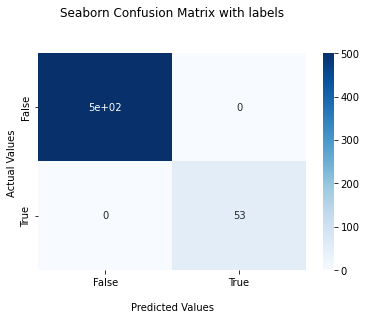

In [479]:

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Model saving

In [506]:
from pickle import dump
from pickle import load

In [507]:
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

In [511]:
# load the model from disk
loaded_model = load(open('filename', 'rb'))


In [483]:
Y_validation

2032    0
1303    0
2866    0
940     0
2809    0
       ..
2631    0
2924    1
284     0
1892    1
2767    0
Name: churn, Length: 554, dtype: int64

### generalized linear model (GLM) to gain some statistics of the respective features with the target.

In [484]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in telecom.columns]

#Effect the change to the dataframe column names
telecom.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['account_length', 'churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'churn ~ {glm_columns}', data=telecom, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                 2767
Model:                            GLM   Df Residuals:                     2750
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -657.83
Date:                Sun, 29 May 2022   Deviance:                       1315.7
Time:                        09:47:40   Pearson chi2:                 5.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1852
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -12

In [485]:
np.exp(res.params)

Intercept                 3.204383e-06
voice_mail_plan           6.171405e-02
voice_mail_messages       1.053851e+00
day_mins                  9.883008e+01
evening_mins              3.914589e+00
night_mins                2.407295e+00
international_mins        3.889715e-04
customer_service_calls    1.022931e+00
international_plan        1.130854e+01
day_calls                 1.002533e+00
day_charge                1.418978e-09
evening_calls             1.000145e+00
evening_charge            8.386468e-05
night_calls               1.003418e+00
night_charge              2.604814e-06
international_calls       8.775838e-01
international_charge      4.790715e+15
total_charge              1.485019e-03
dtype: float64

## Feature Scaling

In [486]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
telecom['day_charge'] = sc.fit_transform(telecom[['day_charge']])
telecom['evening_charge'] = sc.fit_transform(telecom[['evening_charge']])
telecom['night_charge'] = sc.fit_transform(telecom[['night_charge']])
telecom['international_charge'] = sc.fit_transform(telecom[['international_charge']])
telecom['total_charge'] = sc.fit_transform(telecom[['total_charge']])

In [487]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = telecom.drop('churn', axis=1)
y = telecom['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  


#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.914560770156438
precision:  0.7
recall:  0.17721518987341772
f1_score:  0.890714182343027


In [488]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

## Recursive Feature Elimination

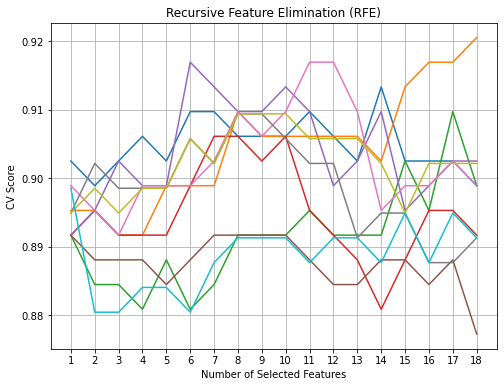

The optimal number of features: 8


In [489]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

### Saving the dataframe

In [490]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (2767, 18)
"X" column list: ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge']
"X_rfe" dimension: (2767, 8)
"X_rfe" column list: ['voice_mail_plan', 'international_plan', 'day_charge', 'evening_charge', 'night_charge', 'international_calls', 'international_charge', 'total_charge']


## Logistic Regression

In [491]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.914560770156438
precision:  0.7
recall:  0.17721518987341772
f1_score:  0.890714182343027


## SVC Classification

In [492]:
svc_model = modeling(SVC, "SVC Classification")

SVC Classification
accuracy:  0.9049338146811071
precision:  0.0
recall:  0.0
f1_score:  0.8597728725713107


## Random Forest

In [493]:
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.9819494584837545
precision:  1.0
recall:  0.810126582278481
f1_score:  0.9810918755669126


## Decision Tree Classification

In [494]:
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.9422382671480144
precision:  0.6565656565656566
recall:  0.8227848101265823
f1_score:  0.945094078313733


## Naive Bayes Classification

In [495]:
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.9001203369434416
precision:  0.484375
recall:  0.7848101265822784
f1_score:  0.910260020452306


## Improve best model by hyperparameter tuning

In [496]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
# summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
params = result.best_params_

#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression', params=params)

Logistic Regression
accuracy:  0.914560770156438
precision:  0.6333333333333333
recall:  0.24050632911392406
f1_score:  0.8967044218432854


In [497]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']

In [515]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(rf_model,f)


In [518]:
df = pd.read_pickle('model_pickle')
df

RandomForestClassifier()

# Deployment

we user the fastapi to deploye our model